In [32]:
# Importing the libraries
import scipy.cluster.hierarchy as hc

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [33]:
df.shape

(200, 5)

In [34]:
df = df.rename(columns={'Annual Income (k$)': 'annual_income', 'Spending Score (1-100)': 'spending_score'})
df.head()

,CustomerID,Genre,Age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [37]:
X = df[['annual_income', 'spending_score']]
X.head()

,annual_income,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


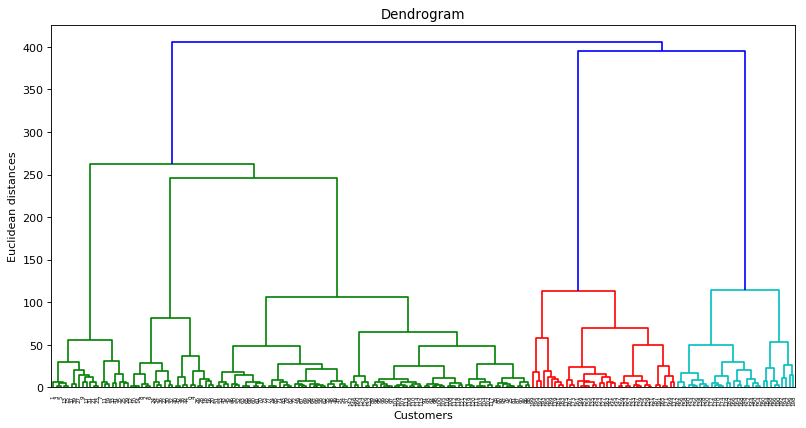

In [38]:
from matplotlib.pyplot import figure

figure(figsize=(12, 6), dpi=80, facecolor='w', edgecolor='b')

dendrogram = hc.dendrogram(hc.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [43]:
X = df.iloc[:, [3, 4]].values
y = df.iloc[:, 3].values


# Splitting the dataset into the Training set and Test set

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling

from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

C:\Users\Titan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


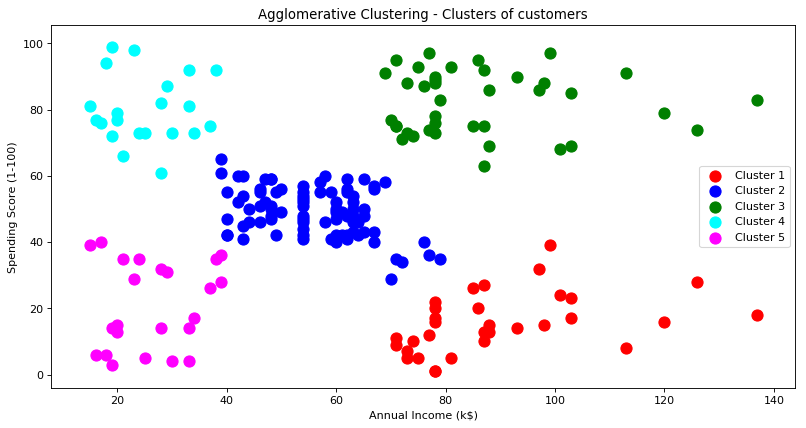

In [42]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering

figure(figsize=(12, 6), dpi=80, facecolor='w', edgecolor='b')

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

plt.title('Agglomerative Clustering - Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()